In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Fes_system/amns_fes_main/csv/Batch-1.1.csv')
df.head()

df1 = pd.read_csv('/content/drive/MyDrive/Fes_system/amns_fes_main/csv/Batch-1.2.csv')
df1.head()

df2 = pd.read_csv('/content/drive/MyDrive/Fes_system/amns_fes_main/csv/Batch-1.3.csv')
df2.head()

df3 = pd.read_csv('/content/drive/MyDrive/Fes_system/amns_fes_main/csv/Batch-1.4.csv')
df3.head()

,SampleTime,Process Mode,Oxygen Consumption -Top,Furnace Power,CombustionChamber Pressure,Suction Damper Position feedback,FDC inlet Temprature,FDC Outlet Temp,FDC Outlet Temp - Upperside,DP across FDC,...,DP Across baghouse - UpperSide,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,Unnamed: 19,Unnamed: 20,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed,ID Fan2 Current
0,11.08.2024_11.45.17,ESH_DD_S7_PRG/PLC->HMI.EafPhaseMode,ESH_CON_S7_PRG/ProData_C1.TotO2Lnc,ESH_CON_S7_PRG/ProData_C1.TotalEn,12AA001-PIA002/PRESSURE.OutV,SUCTION_SH1/POSITION.OutV,12AP001-TIA001/TEMPERATURE.OutV,12BA001-TIA001/Temperature.OutV,12BA001-TIA002/Temperature.OutV,12BA001-DPT001/Pressure.OutV,...,12AQ001-DPT001/Pressure.OutV,12AQ001-DPT002/Pressure.OutV,12AQ001-PIA001/Pressure.OutV,CANOPY_SH1/POSITION.OutV,12AA001-TIA001/Temperature.OutV,12AP001-TIA005/Temperature.OutV,ESH_DD_S7_PRG/PLC->HMI4.Sh11_IDfan1_Speed_FB,ESH_DD_S7_PRG/PLC->HMI4.Sh11_IDfan1_Current_FB,ESH_DD_S7_PRG/PLC->HMI4.Sh11_IDfan2_Speed_FB,ESH_DD_S7_PRG/PLC->HMI4.Sh11_IDfan2_Current_FB
1,29.08.2024_18.24.38,32,5631.284,0,-14.00463,89.00825,494.0611,189.6,190.3,79.20645,...,16.89091,20.68721,-410.8796,61.46122,41.8,87.90001,946.2,217.775,945.4032,218.1965
2,29.08.2024_18.29.38,64,6632.452,0,-9.964554,52.36545,489.247,180,180.1,24.75405,...,16.72743,20.60475,-404.116,64.78335,43.6,78.9,946.2,222.7628,945.4032,223.676
3,29.08.2024_18.34.38,64,7540.279,0,-10.01157,45.20037,413.4151,155.9,155.5,26.14294,...,16.06626,19.59057,-397.3163,64.77937,40.3,68.9,946.2,222.4818,945.4032,227.6803
4,29.08.2024_18.39.37,16,7540.279,0.4,-8.991608,41.59071,297.4392,121.7,121.9,7.096354,...,14.55295,18.04832,-402.6331,62.5076,41.7,63.6,946.2,222.833,945.4032,217.3535


In [21]:
df = df.drop(0)
df1 = df1.drop(0)
df2 = df2.drop(0)
df3 = df3.drop(0)

In [22]:
# df = df.drop(['Unnamed: 19','Unnamed: 20',],axis=1)
# df1 = df1.drop(['Unnamed: 19','Unnamed: 20'],axis=1)
# df2 = df2.drop(['Unnamed: 19','Unnamed: 20'],axis=1)
# df3 = df3.drop(['Unnamed: 19','Unnamed: 20'],axis=1)

In [23]:
df = pd.concat([df, df1])
df = pd.concat([df, df2])
df = pd.concat([df, df3])

In [24]:
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(4319, 25)
(1080, 25)
(1079, 25)
(1081, 25)


In [25]:
df = df.iloc[:,1:24]
df.head()
df.columns

Index(['Process Mode', 'Oxygen Consumption -Top', 'Furnace Power',
       'CombustionChamber Pressure', 'Suction Damper Position feedback',
       'FDC inlet Temprature', 'FDC Outlet Temp',
       'FDC Outlet Temp - Upperside', 'DP across FDC', 'FDC Outlet Pressure',
       'Pressure at Gas Mixter inlet', 'Temp at BagHouse Inlet - UpperSide',
       'Temp at BagHouse Inlet - LowerSide', 'Pressure at BagHouse Inlet',
       'DP Across baghouse - UpperSide', 'DP Across baghouse - LowerSide',
       'Pressure ID Fan Inlet', 'Canopy Damper Position', 'Unnamed: 19',
       'Unnamed: 20', 'ID Fan1 Speed', 'ID Fan1 Current', 'ID Fan2 Speed'],
      dtype='object')

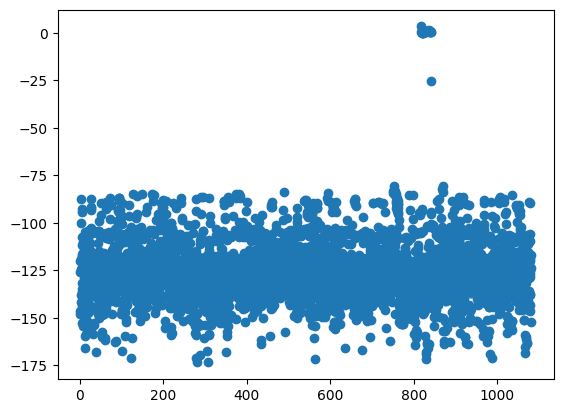

In [26]:
# Convert the specific column to numeric before plotting
df['Pressure at Gas Mixter inlet'] = pd.to_numeric(df['Pressure at Gas Mixter inlet'], errors='coerce')

# Now plot the scatter plot with numeric data
plt.scatter(df['Pressure at Gas Mixter inlet'].index,df['Pressure at Gas Mixter inlet'].values)

In [27]:
#we can see every column is having datatype of 'object'
#so convert all column datatype into numeric

for col in df.columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4319 entries, 1 to 1081
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Process Mode                        4319 non-null   int64  
 1   Oxygen Consumption -Top             4319 non-null   float64
 2   Furnace Power                       4319 non-null   float64
 3   CombustionChamber Pressure          4319 non-null   float64
 4   Suction Damper Position feedback    4319 non-null   float64
 5   FDC inlet Temprature                4319 non-null   float64
 6   FDC Outlet Temp                     4319 non-null   float64
 7   FDC Outlet Temp - Upperside         4319 non-null   float64
 8   DP across FDC                       4319 non-null   float64
 9   FDC Outlet Pressure                 4319 non-null   float64
 10  Pressure at Gas Mixter inlet        4319 non-null   float64
 11  Temp at BagHouse Inlet - UpperSide  4319 non-nul

In [28]:
avg = df['Pressure at Gas Mixter inlet'].mean()
print(avg)
df.corr()['Pressure at Gas Mixter inlet'].sort_values(ascending=False)

-124.8258773387173


,Pressure at Gas Mixter inlet
Pressure at Gas Mixter inlet,1.000000
FDC Outlet Pressure,0.941599
Pressure at BagHouse Inlet,0.910772
Pressure ID Fan Inlet,0.818537
Canopy Damper Position,0.744081
CombustionChamber Pressure,0.455567
Unnamed: 19,0.344914
Furnace Power,0.133470
Process Mode,0.036799
Suction Damper Position feedback,0.029110


Axes(0.125,0.11;0.775x0.77)


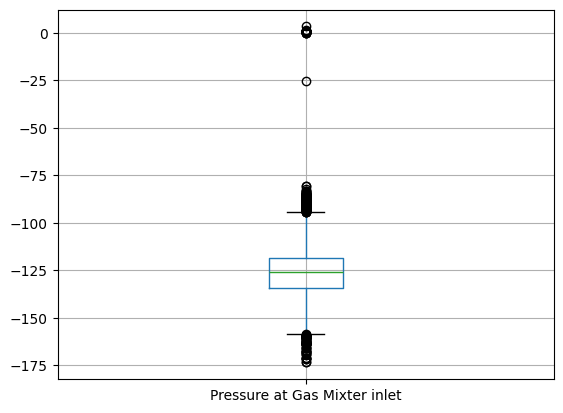

In [29]:
# print(df.boxplot('DP across FDC'))
print(df.boxplot('Pressure at Gas Mixter inlet'))

In [30]:
df.shape

(4319, 23)

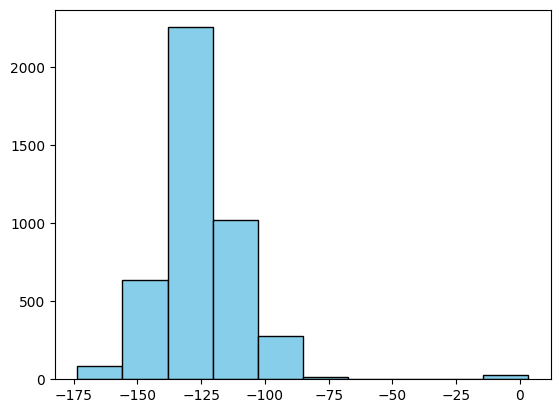

In [31]:
plt.hist(df['Pressure at Gas Mixter inlet'], bins=10, color='skyblue', edgecolor='black')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Pressure at Gas Mixter inlet'], axis=1),df['Pressure at Gas Mixter inlet'],test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((3455, 22), (864, 22))

In [33]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()


# scaler.fit(x_train)


# x_train_scaled = scaler.transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [34]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(x_train)

# # transform train and test sets
# x_train_scaled_normalized = scaler.transform(x_train)
# x_test_scaled_normalized = scaler.transform(x_test)

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor # Import the regressor

param_grid = {
    # The parameter grid seems to be defined for a classifier, not a regressor.
    # For RandomForestRegressor, the parameters would be like:
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    # criterion for regressor is 'squared_error', 'absolute_error', 'poisson', etc.
    # 'criterion': ['squared_error']
}

# Create a RandomForestRegressor instance
estimator = RandomForestRegressor(random_state=42) # Added random_state for reproducibility

# Pass the estimator and the parameter grid to GridSearchCV
# Note: You might need to adjust the param_grid to match the parameters of RandomForestRegressor
# and remove the 'classification__' prefix if you are not using a Pipeline named 'classification'.
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5) # Added cv for cross-validation

In [36]:
grid_search.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 400}
Best cross-validation score:  0.9710080824131765


In [37]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# rand = RandomForestRegressor(
#     n_estimators=650,
#     max_depth=21,
#     min_samples_split=4,
#     max_features='sqrt',
# )
# # x_train_rand = rand.fit(x_train, y_train)
# # y_pred_rand = rand.predict(x_test)
# # plt.grid(True)
# # plt.scatter(y_pred_rand, y_test)

In [38]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rand, x_train, y_train, cv=kf)

In [39]:
print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")

print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results (Accuracy):
  Fold 1: 97.66%
  Fold 2: 98.02%
  Fold 3: 98.07%
  Fold 4: 97.68%
  Fold 5: 97.69%
Mean Accuracy: 97.82%


In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

arr = []
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Support Vector Regressor": SVR(),
        "Neural Network (MLP)": MLPRegressor(max_iter=1000)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        results.append((name, mae, rmse, r2))
        arr.append(y_pred)
        # print(name)
        # plt.scatter(y_pred, y_test)
        # plt.show()

    # Print results
    print(f"{'Model':30} {'MAE':>10} {'RMSE':>10} {'R² Score':>10}")
    print("="*60)
    for name, mae, rmse, r2 in sorted(results, key=lambda x: x[2]):  # sort by RMSE
        print(f"{name:30} {mae:10.2f} {rmse:10.2f} {r2:10.4f}")


In [41]:
evaluate_models(x_train, x_test, y_train, y_test)
# evaluate_models(x_train_scaled, x_test_scaled, y_train, y_test)
# evaluate_models(x_train_scaled_normalized, x_test_scaled_normalized, y_train, y_test)

Model                                 MAE       RMSE   R² Score
Random Forest                        1.91       2.46     0.9780
Ridge Regression                     2.03       2.55     0.9764
Linear Regression                    2.03       2.55     0.9764
Gradient Boosting                    2.00       2.61     0.9754
Lasso Regression                     2.07       2.65     0.9746
Decision Tree                        2.81       3.63     0.9522
Neural Network (MLP)                 3.22       4.45     0.9281
Support Vector Regressor            11.04      16.05     0.0663
